## DNN Example for Fashion MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Add, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

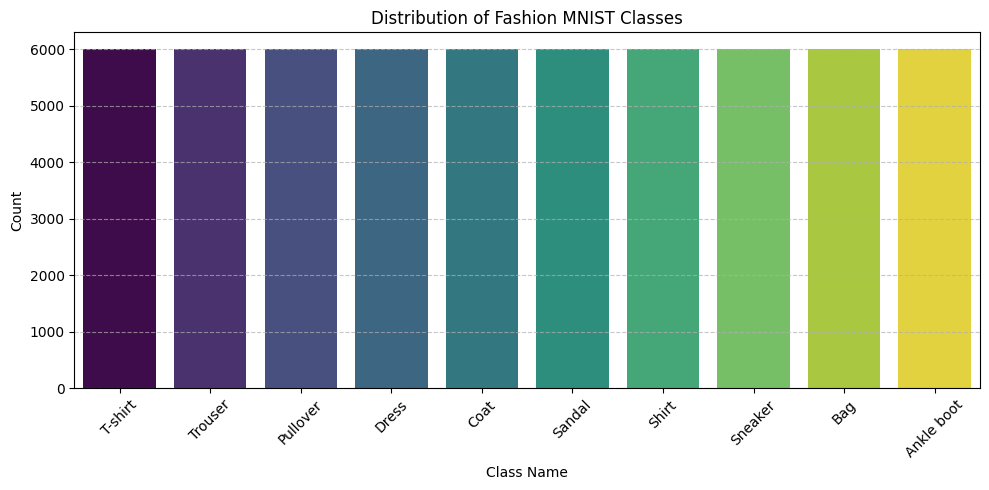

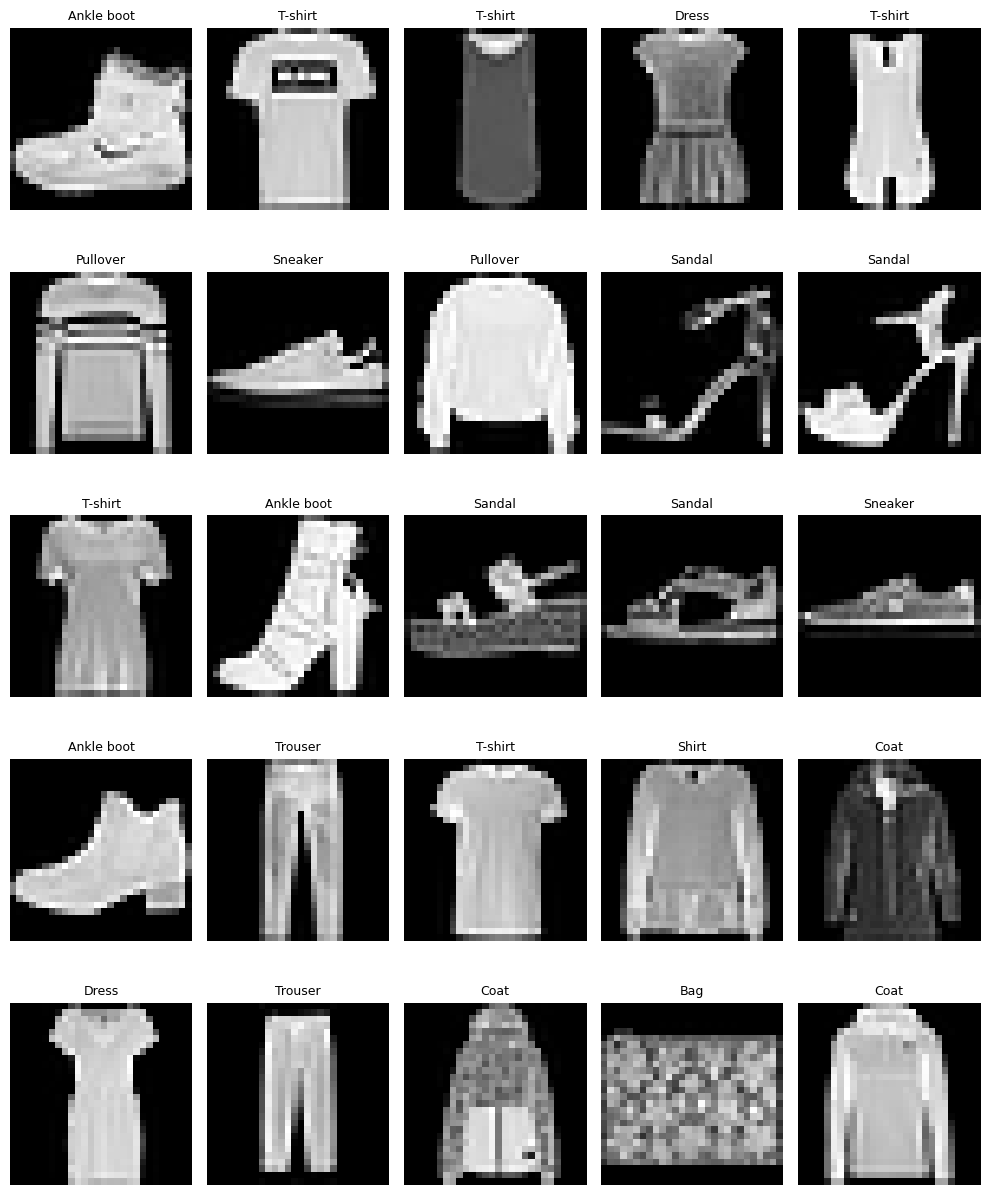

In [4]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [6]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    
    model = models.Sequential([
        layers.Input(shape=(784,)),
        
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),
        
        layers.Dense(384, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.35),
        
        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        
        layers.Dense(192, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.25),
        
        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),
        
        layers.Dense(96, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.15),
        
        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),
        
        layers.Dense(32, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.05),
        
        layers.Dense(16, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.05),
        
        layers.Dense(10, activation='softmax')
    ])
    
    return model


In [7]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 384)            │       196,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 384)            │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 192)            │        49,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 192)            │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 96)             │        12,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │             

 Total params: 799,610 (3.05 MB)

 Trainable params: 796,250 (3.04 MB)

 Non-trainable params: 3,360 (13.12 KB)

In [9]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 34s - 92ms/step - accuracy: 0.6159 - loss: 1.1525 - val_accuracy: 0.7971 - val_loss: 0.5977
Epoch 2/20
375/375 - 19s - 51ms/step - accuracy: 0.7835 - loss: 0.6457 - val_accuracy: 0.7989 - val_loss: 0.6330
Epoch 3/20
375/375 - 20s - 52ms/step - accuracy: 0.8175 - loss: 0.5549 - val_accuracy: 0.8396 - val_loss: 0.4507
Epoch 4/20
375/375 - 20s - 54ms/step - accuracy: 0.8325 - loss: 0.5057 - val_accuracy: 0.8605 - val_loss: 0.4048
Epoch 5/20
375/375 - 19s - 50ms/step - accuracy: 0.8411 - loss: 0.4769 - val_accuracy: 0.8580 - val_loss: 0.4131
Epoch 6/20
375/375 - 15s - 39ms/step - accuracy: 0.8478 - loss: 0.4517 - val_accuracy: 0.8724 - val_loss: 0.3693
Epoch 7/20
375/375 - 11s - 29ms/step - accuracy: 0.8556 - loss: 0.4319 - val_accuracy: 0.8621 - val_loss: 0.3998
Epoch 8/20
375/375 - 11s - 30ms/step - accuracy: 0.8594 - loss: 0.4210 - val_accuracy: 0.8622 - val_loss: 0.3743
Epoch 9/20
375/375 - 11s - 29ms/step - accuracy: 0.8635 - loss: 0.4040 - val_accuracy: 0.8640 - 

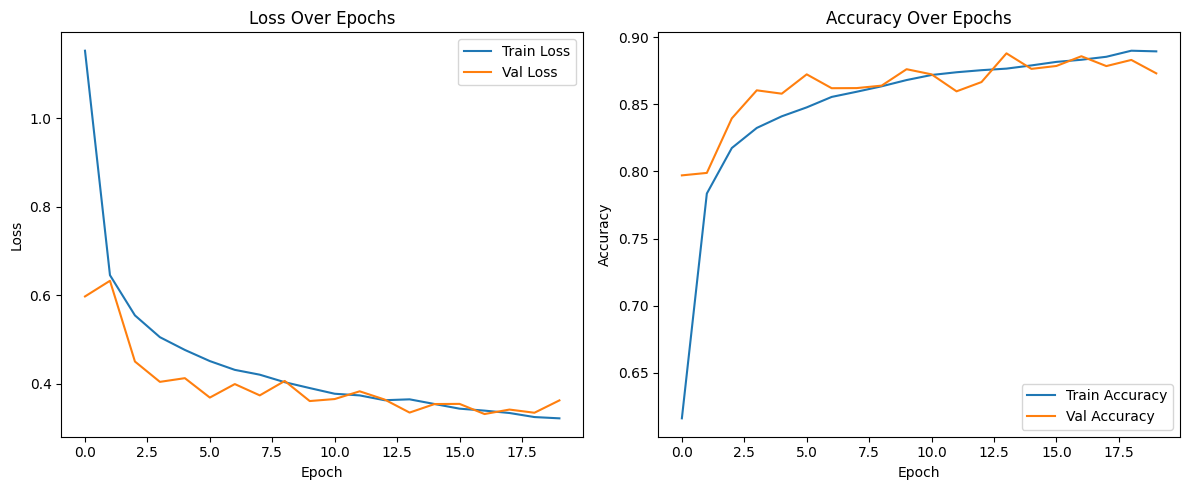

In [10]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [11]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8628


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


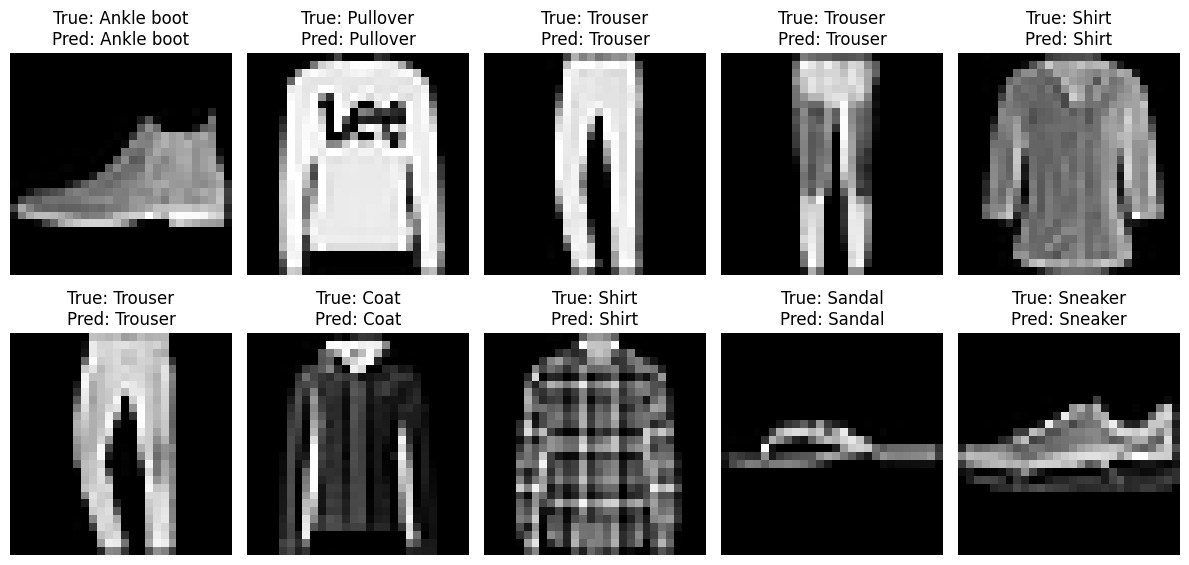

In [12]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

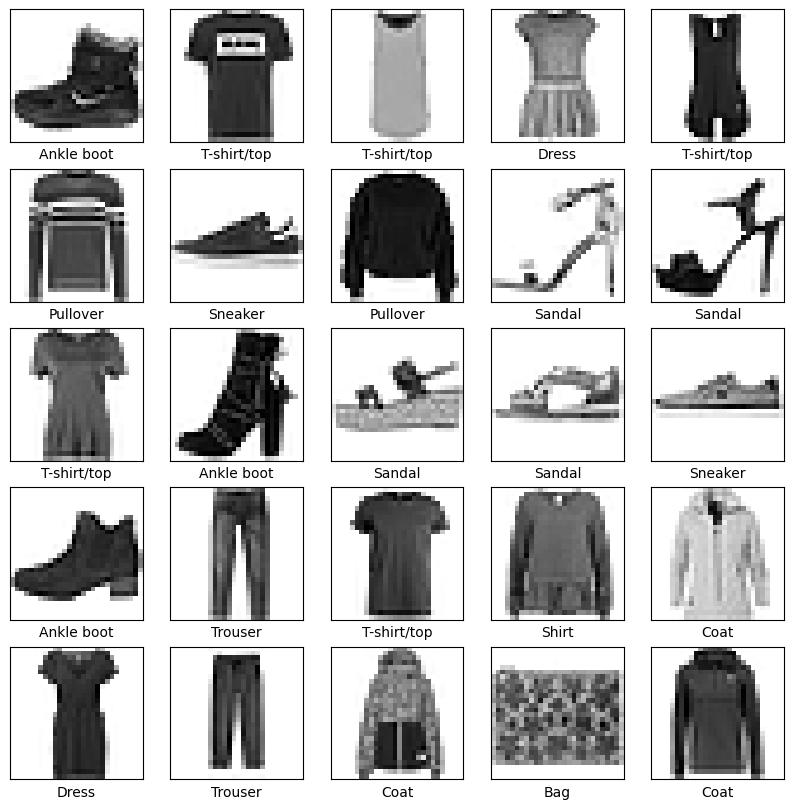

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [ ]:

def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512, activation='relu')(inputs)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)


def create_resnet_dnn():
    inputs = Input(shape=(784,))

    
    x = Dense(256, kernel_initializer='he_normal')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    
    x1 = Dense(256, kernel_initializer='he_normal')(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Dropout(0.2)(x1)

    x2 = Dense(256, kernel_initializer='he_normal')(x1)
    x2 = BatchNormalization()(x2)
    x2 = Activation('relu')(x2)

    res1 = Add()([x, x2])
    res1 = Activation('relu')(res1)

    
    x3 = Dense(128, kernel_initializer='he_normal')(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('relu')(x3)
    x3 = Dropout(0.2)(x3)

    x4 = Dense(128, kernel_initializer='he_normal')(x3)
    x4 = BatchNormalization()(x4)
    x4 = Activation('relu')(x4)

    res1_down = Dense(128, kernel_initializer='he_normal')(res1)
    res1_down = BatchNormalization()(res1_down)

    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    
    x5 = Dense(64, kernel_initializer='he_normal')(res2)
    x5 = BatchNormalization()(x5)
    x5 = Activation('relu')(x5)
    x5 = Dropout(0.2)(x5)

    x6 = Dense(64, kernel_initializer='he_normal')(x5)
    x6 = BatchNormalization()(x6)
    x6 = Activation('relu')(x6)

    res2_down = Dense(64, kernel_initializer='he_normal')(res2)
    res2_down = BatchNormalization()(res2_down)

    res3 = Add()([res2_down, x6])
    res3 = Activation('relu')(res3)

    
    outputs = Dense(10, activation='softmax')(res3)

    return Model(inputs, outputs)

In [15]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train models
dnn_history = dnn_model.fit(x_train_flat, y_train, 
                            epochs=30, 
                            batch_size=128, 
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train, 
                                 epochs=30, 
                                 batch_size=128, 
                                 validation_split=0.2,
                                 verbose=1)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.6468 - loss: 0.9724 - val_accuracy: 0.8398 - val_loss: 0.4450
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8525 - loss: 0.4061 - val_accuracy: 0.8620 - val_loss: 0.3888
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8675 - loss: 0.3571 - val_accuracy: 0.8692 - val_loss: 0.3614
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8812 - loss: 0.3257 - val_accuracy: 0.8625 - val_loss: 0.3972
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8868 - loss: 0.3088 - val_accuracy: 0.8724 - val_loss: 0.3684
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.8937 - loss: 0.2913 - val_accuracy: 0.8762 - val_loss: 0.3623
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8969 - loss: 0.2860 - val_accuracy: 0.8733 - val_loss: 0.3580
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9027 - loss: 0.2612 - va

In [17]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

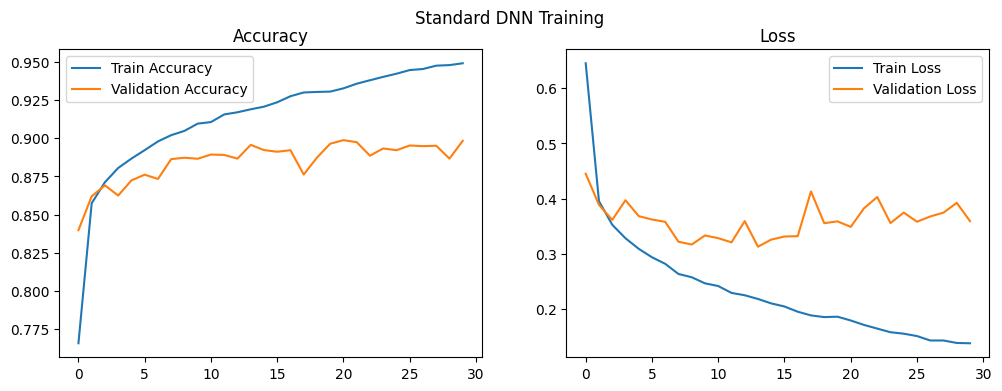

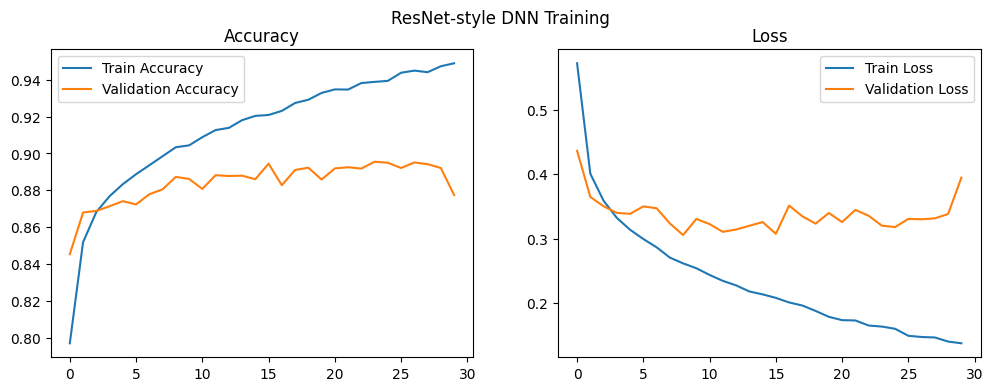

In [18]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [24]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=1)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8901 - loss: 0.4108
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8703 - loss: 0.4155


In [25]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8902
ResNet-style DNN Test Accuracy: 0.8709



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


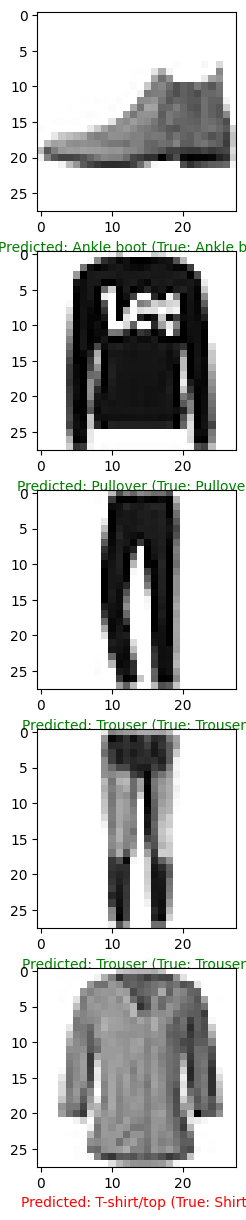


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


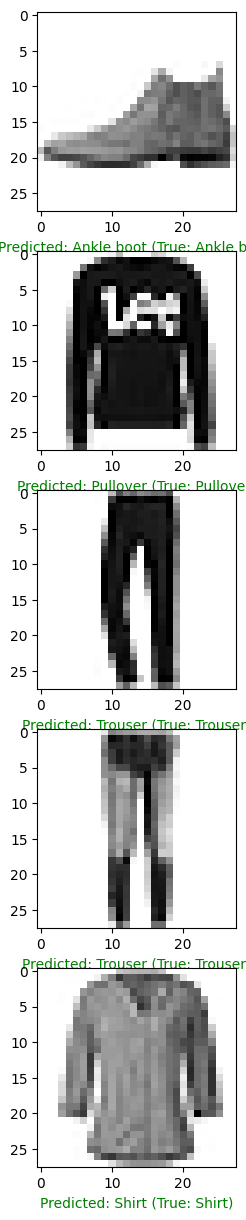

In [21]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)